In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import neighbors
from sklearn.model_selection import cross_val_score
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std

#### Data

The data is obtained from UCI's machine learning repository and contains information on concrete strenght based on various factors.  There are 1,030 rows, and 9 columns.

Link: https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength

In [2]:
data = pd.read_csv("Concrete_Data.csv")

In [3]:
# Get number of rows and columns
data.shape

(1030, 9)

In [4]:
#View columns - Need to clean up to make easier to work with
data.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [5]:
#See data
data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [6]:
#Rename columns ot make easier to work with
data.columns =["cement","slag","ash","water","superplasticizer","coarse","fine","age","strength"]

In [7]:
def print_OLS_output():
    lm = smf.ols(formula=linear_formula, data = data).fit()
    print("Parameters:")
    print(lm.params)
    print("\n P-Values")
    print(lm.pvalues)
    print("\n R-Squared:")
    (print(lm.rsquared))
    return

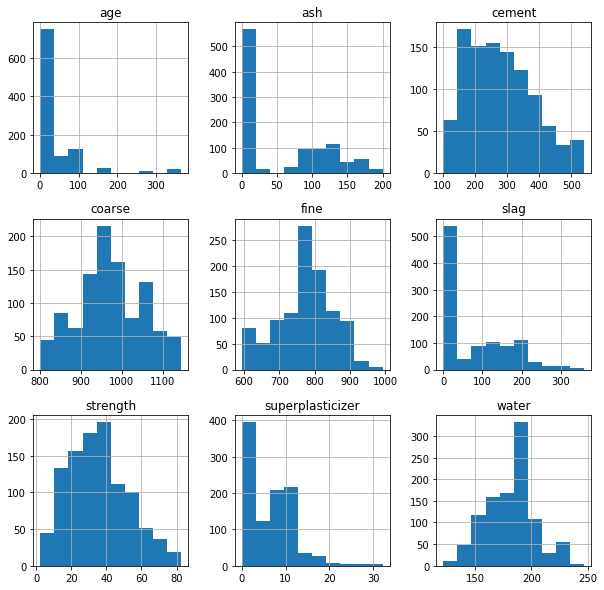

In [8]:
#Histograms of all columns
data.hist(figsize=(10,10))
plt.show()

In [9]:
#Descriptive statistics for the data
data.describe()

,cement,slag,ash,water,superplasticizer,coarse,fine,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [10]:
#Create modified factors
data["ash_modified"] = np.where(data.ash >0,1,0)

In [11]:
def run_knn():
    knn = neighbors.KNeighborsRegressor(n_neighbors=15, weights='distance')
    knn.fit(X, Y)
    score = cross_val_score(knn, X, Y, cv=3)
    print("KNN Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
    

In [12]:
#Run KNN for all factors
X = data[["cement","slag","ash","water","superplasticizer","coarse","fine","age"]]
Y = data["strength"]
run_knn()

KNN Accuracy: 0.41 (+/- 0.15)


In [18]:
#OLS on original model
linear_formula = "strength ~ cement+slag+ash+water+superplasticizer+coarse+fine+age"
print_OLS_output()

Parameters:
Intercept          -23.331214
cement               0.119804
slag                 0.103866
ash                  0.087934
water               -0.149918
superplasticizer     0.292225
coarse               0.018086
fine                 0.020190
age                  0.114222
dtype: float64

 P-Values
Intercept           3.803719e-01
cement              1.897989e-41
slag                1.598993e-23
ash                 5.019648e-12
water               2.008798e-04
superplasticizer    1.810241e-03
coarse              5.442481e-02
fine                5.949075e-02
age                 5.782491e-82
dtype: float64

 R-Squared:
0.615519870414


In [20]:
# OLS after modifying model
linear_formula = "strength ~ cement+slag+water+superplasticizer+age+ash_modified"
print_OLS_output()

Parameters:
Intercept           29.590360
cement               0.105938
slag                 0.089749
water               -0.225667
superplasticizer     0.173550
age                  0.115141
ash_modified         9.874820
dtype: float64

 P-Values
Intercept            1.660252e-12
cement              1.998561e-117
slag                 1.889200e-65
water                9.421646e-26
superplasticizer     3.940716e-02
age                  5.398153e-85
ash_modified         1.032906e-23
dtype: float64

 R-Squared:
0.623308455617


In [21]:
#Run KNN with model updates from OLS
X = data[["cement","slag","ash","water","superplasticizer","age","ash_modified"]]
Y = data["strength"]
run_knn()

KNN Accuracy: 0.53 (+/- 0.11)


Between the two models I like OLS regression more because of the ability to easily see p-values and which features are benefiting the model and which aren't.  Seeing the p-values for KNN may be possible but the quick research I found made it seem like they were more complex to reach.  But with OLS and statsmodels it's easy to quickly see. With extensive domain knowledge and experience I imagine KNN may become more useful than I currently see it.  The key challenges(which with experience may become benefits) are in part how much adjusting can be done to KNN.  Being able to choose the number of neighbors as well as whether to use weighting or not may be powerful tools I'll need to master long term, but as this point I'm still guessing and haven't fully gotten and understanding of how to get the most of either adjustments.  That being said I also wonder whether KNN is more sensitive to noise and outliers.  My current thinking is that OLS by building a model that is designed to draw across the dataset, may be less susceptible to being distorted.  Also in terms of making predictions that aren't explicitly within your dataset KNN doesn't seem like that would be possible at all, while with OLS the farther outside the bounds of your dataset the less accurately it obviously becomes.  But I still believe based on my current understand OLS would be more effective for than KNN.  One unfortunate piece to this exercise was that I didn't realize that this data set was in the UCI datbase submitted by someone who did reasearch as to why regression is not an appropriate modeling method for this specific set of data.  Instead they suggested and I briefly glanced through their paper as to how they were able to obtain much better results using neural networks.  However while I was never able to obtain a particularly good rsquared, I was able to make adjustments to the model to improve it versus my first version.